# Homework 3 Linear Regression
Name: Caden Matthews

Date: 09/11/2024

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Linear regression is a fundamental machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables. In this homework, we'll implement linear regression from scratch to understand its inner workings. We'll start with a simple case of predicting profits for a food truck based on the population of the city it's in.
We'll begin by setting up our environment and loading the dataset. This involves importing the necessary Python libraries and reading our data from a file.

In [98]:
# TODO: Import the necessary libraries (numpy, matplotlib.pyplot, and pandas)

# TODO: Load the dataset 'ex1data1.txt' using pandas
# The file contains two columns:
# - First column is the population of a city (in 10,000s)
# - Second column is the profit of a food truck in that city (in $10,000s)
# Use appropriate column names: 'Population' and 'Profit'

data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])

# TODO: Print the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
print()

# TODO: Print some basic statistics of the dataset
print("Basic statistics of the dataset:")
print(data.describe())

First few rows of the dataset:
   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

Basic statistics of the dataset:
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


Data visualization is an essential step in any data analysis or machine learning project. It helps us understand the structure of our data, identify patterns, detect outliers, and gain insights into potential relationships between variables. For our linear regression problem, we'll create a scatter plot to visualize the relationship between city population and food truck profit.

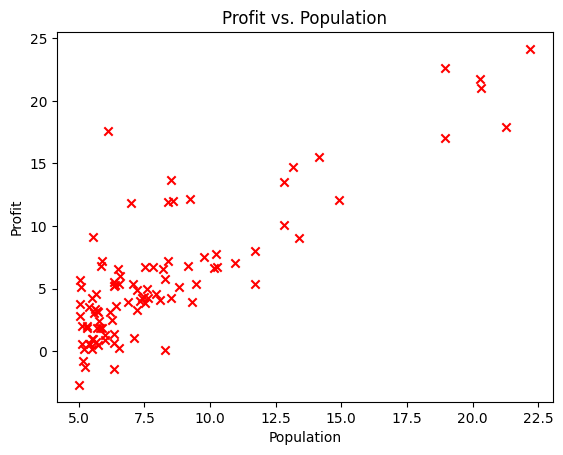

In [99]:
# TODO: Create a scatter plot of the data
# Use matplotlib to create a figure
# Plot Population on the x-axis and Profit on the y-axis
# Set appropriate labels for the axes and a title for the plot
# Use red 'x' markers for the data points
# Make sure to show the plot

plt.scatter(data['Population'], data['Profit'], color='red', marker='x')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Profit vs. Population')
plt.show()

# Hint: You can use plt.scatter() for the plot, and plt.xlabel(), plt.ylabel(), and plt.title() for labels

Linear regression aims to find a linear relationship between the input variable (population) and the output variable (profit). We'll use the hypothesis function h(x) = θ₀ + θ₁x, where θ₀ and θ₁ are the parameters we need to learn.

The cost function J(θ) measures how well our hypothesis fits the data. We'll use the mean squared error cost function. Gradient descent is an optimization algorithm that we'll use to find the values of θ₀ and θ₁ that minimize the cost function.

In [100]:
#Cost Function:

import numpy as np

def compute_cost(X, y, theta):
    """
    Compute the cost function J(theta) for linear regression.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - current parameters

    Returns:
    J : float - the current value of the cost function
    """
    # TODO: Implement the cost function
    # 1. Compute the number of training examples (m)
    # 2. Compute the predictions using X and theta
    # 3. Compute the squared errors
    # 4. Compute the average cost

    m = len(y) # number of training
    h = X.dot(theta) # predictions
    err = (h-y)**2 # squared errors
    J = 1/(2*m) * err.sum() # average cost

    return J

# Test the cost function
X = np.column_stack((np.ones(len(data)), data['Population']))
y = data['Profit'].values
theta = np.zeros(2)

print(f"Cost at initial theta (zeros): {compute_cost(X, y, theta):.3f}")

Cost at initial theta (zeros): 32.073


In [101]:
#Gradient Descent

def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent to optimize theta.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - initial parameters
    alpha : float - learning rate
    num_iters : int - number of iterations to run gradient descent

    Returns:
    theta : numpy array of shape (n+1,) - the optimized parameters
    J_history : list - the cost function value history
    """
    # TODO: Implement gradient descent
    # 1. Get the number of training examples (m)
    # 2. Make a copy of theta to update
    # 3. Create an empty list to store cost function history
    # 4. Implement the gradient descent loop:
    #    a. Compute predictions
    #    b. Compute the errors
    #    c. Update theta
    #    d. Calculate and store the cost for this iteration

    m = len(y) # number of training examples
    theta = theta.copy() # copy of theta
    J_history = [] # cost function history

    # gradient descent loop
    for i in range(num_iters):
        h = X.dot(theta) # predictions
        err = h - y # errors
        theta = theta - alpha * (1/m) * (X.T.dot(err)) # update theta
        J_history.append(compute_cost(X, y, theta)) # cost function

    return theta, J_history

# Run gradient descent
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

print("Theta found by gradient descent:")
print(f"theta_0 = {theta[0]:.4f}")
print(f"theta_1 = {theta[1]:.4f}")

Theta found by gradient descent:
theta_0 = -3.6303
theta_1 = 1.1664


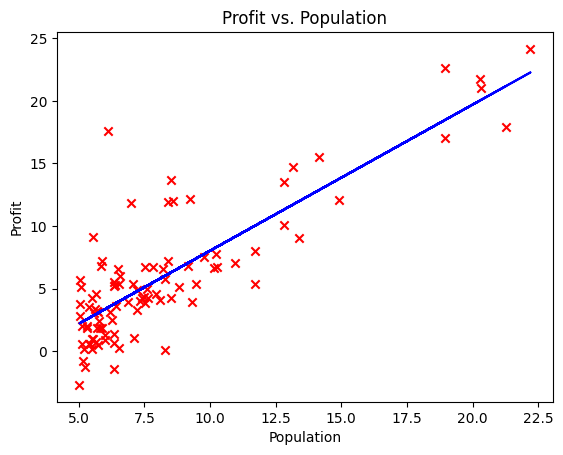

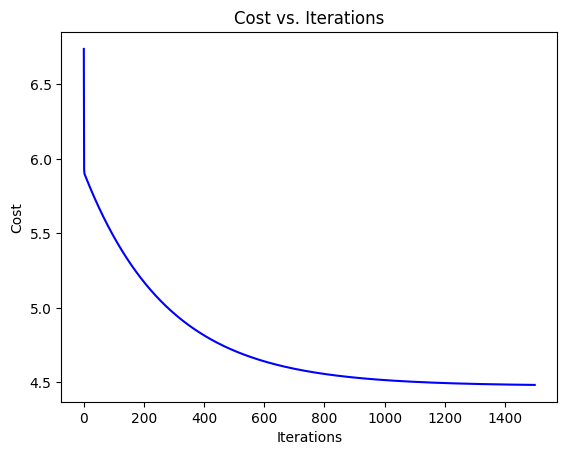

In [102]:
#Visualizing Results

# TODO: Plot the linear fit
# 1. Create a scatter plot of the data
# 2. Plot the linear fit using the optimized theta values
# 3. Add labels and title

plt.scatter(data['Population'], data['Profit'], color='red', marker='x')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Profit vs. Population')
plt.plot(X[:,1], X.dot(theta), color='blue')
plt.show()

# TODO: Plot the convergence graph
# 1. Create a new figure
# 2. Plot the cost function values against the number of iterations
# 3. Add labels and title

plt.plot(range(iterations), J_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

Now that we have trained our linear regression model and found the optimal values for θ₀ and θ₁, we can use these parameters to make predictions for new input values. Our hypothesis function h(x) = θ₀ + θ₁x allows us to estimate the profit for a food truck in a city with a given population. We'll make predictions for a couple of specific population values and then create a function to make predictions for any given population.


Predicted profit for a city with a population of 35,000 (in $10,000's): $28.17
Predicted profit for a city with a population of 70,000 (in $10,000's): $63.05
Predicted profit for a city with a population of 35,000 (in $10,000's): $37.19
Predicted profit for a city with a population of 70,000 (in $10,000's): $78.02


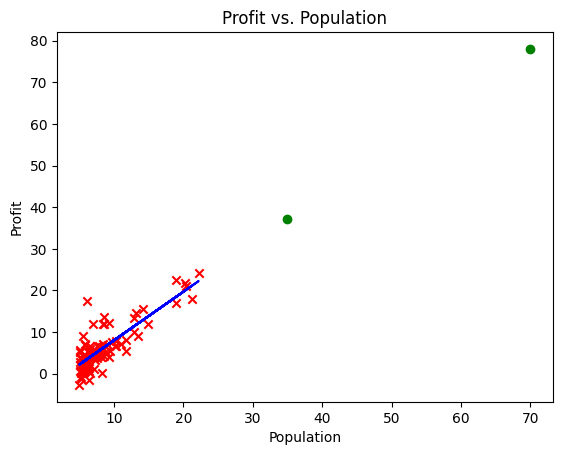

In [103]:
# TODO: Use the trained model to make predictions

# 1. Predict the profit for a city with a population of 35,000
# Hint: Remember to scale the population as per our original data
# Use the gradient descent optimized theta values
# Profit = theta_0 + theta_1 * Population

print(f"Predicted profit for a city with a population of 35,000 (in $10,000's): ${X[1].dot(theta)*10:.2f}")

# 2. Predict the profit for a city with a population of 70,000

print(f"Predicted profit for a city with a population of 70,000 (in $10,000's): ${X[2].dot(theta)*10:.2f}")

# 3. Create a function that takes a population value and returns the predicted profit
# The function should:
#   - Scale the input population (divide by 10,000)
#   - Use the trained theta values to make a prediction
#   - Return the predicted profit

def predict_profit(population):
    """
    Predict the profit for a city with a given population.

    Args:
    population : float - the population of the city

    Returns:
    profit : float - the predicted profit
    """

    scaled_population = population / 1000
    profit = np.array([1, scaled_population]).dot(theta)

    return profit

# 4. Use your function to make predictions for populations of 35,000 and 70,000

print(f"Predicted profit for a city with a population of 35,000 (in $10,000's): ${predict_profit(35000):.2f}")
print(f"Predicted profit for a city with a population of 70,000 (in $10,000's): ${predict_profit(70000):.2f}")

# 5. Create a plot showing the original data, the linear regression line,
#    and the two new predictions as distinct points

plt.scatter(data['Population'], data['Profit'], color='red', marker='x')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Profit vs. Population')
plt.plot(X[:,1], X.dot(theta), color='blue')
plt.scatter([35, 70], [predict_profit(35000), predict_profit(70000)], color='green')
plt.show()
# Print out the predictions and display the plot

Visualizing the cost function J(θ) is crucial for understanding the optimization process in linear regression. The cost function J(θ) is a function of the parameters θ₀ and θ₁. By creating 3D surface and contour plots, we can visualize how the cost changes as we vary these parameters. This will give us insight into why gradient descent moves towards the minimum of this function.

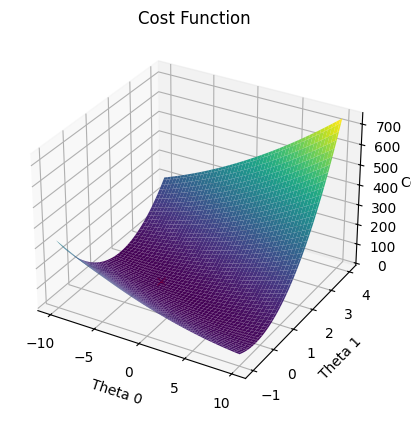

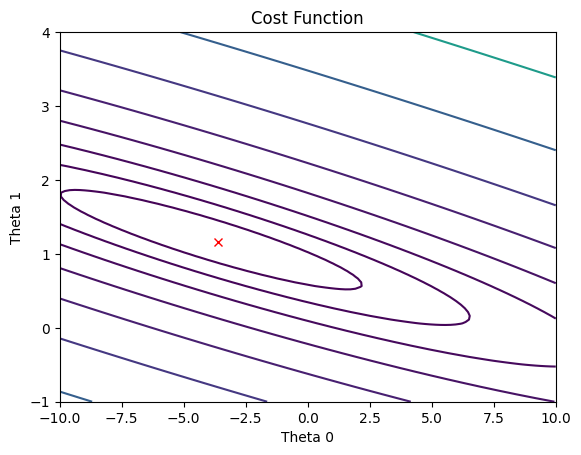

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_cost_function(X, y):
    """
    Create a 3D surface plot and a contour plot of the cost function J(theta).

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    """
    # TODO: Implement the following steps:

    # 1. Create a grid of theta0 and theta1 values
    # Hint: Use np.linspace to create ranges for theta0 and theta1

    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)

    # 2. Initialize J_vals to a matrix of 0's

    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    # 3. Calculate the cost for each combination of theta0 and theta1
    # Hint: Use nested loops to iterate over theta0_vals and theta1_vals

    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            J_vals[i, j] = compute_cost(X, y, [theta0, theta1])

    # 4. Create a 3D surface plot
    # Hint: Use fig.add_subplot(111, projection='3d') to create a 3D subplot

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    ax.plot_surface(T0, T1, J_vals.T, cmap='viridis')
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_zlabel('Cost')
    ax.set_title('Cost Function')

    # 5. Create a contour plot
    # Hint: Use plt.contour for the contour plot

    plt.figure()
    plt.contour(T0, T1, J_vals.T, levels=np.logspace(-2, 3, 20))
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.title('Cost Function')

    # 6. Mark the minimum point on both plots
    # Hint: Use the theta values found by gradient descent

    plt.plot(theta[0], theta[1], 'rx')
    ax.plot([theta[0]], [theta[1]], [compute_cost(X, y, theta)], 'rx')

    # 7. Add labels, titles, and display the plots

    plt.show()

# Call the function with our data
plot_cost_function(X, y)

In this section, we'll extend our linear regression model to work with multiple variables. We'll use a new dataset that includes both the size of houses and the number of bedrooms to predict house prices. We'll also implement feature normalization, which is crucial when dealing with features of different scales.


In [105]:
# Loading the dataset:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TODO: Load the dataset 'ex1data2.txt'
# The file contains three columns:
# - First column is the size of the house (in square feet)
# - Second column is the number of bedrooms
# - Third column is the price of the house
# Use appropriate column names: 'Size', 'Bedrooms', and 'Price'

data = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])

# Print the first few rows and basic statistics of the dataset
print("First few rows of the dataset:")
print(data.head())
print()

print("Basic statistics of the dataset:")
print(data.describe())

First few rows of the dataset:
   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

Basic statistics of the dataset:
              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [106]:
#Feature Normalization:

def normalize_features(X):
    """
    Normalize the features in X.

    Args:
    X : numpy array of shape (m, n) - m examples, n features

    Returns:
    X_norm : numpy array of shape (m, n) - normalized features
    mu : numpy array of shape (n,) - mean of each feature
    sigma : numpy array of shape (n,) - standard deviation of each feature
    """
    # TODO: Implement feature normalization
    # 1. Compute the mean of each feature
    # 2. Compute the standard deviation of each feature
    # 3. Normalize the features by subtracting the mean and dividing by the standard deviation

    mu = X.mean(axis=0) # mean
    sigma = X.std(axis=0) # standard deviation
    X_norm = (X - mu) / sigma # normalization

    return X_norm, mu, sigma

# Normalize the features
X = data[['Size', 'Bedrooms']].values
y = data['Price'].values

X_norm, mu, sigma = normalize_features(X)

print("Normalized features:")
print(pd.DataFrame(X_norm, columns=['Size', 'Bedrooms']).head())
print("\nMean:", mu)
print("Standard deviation:", sigma)

Normalized features:
       Size  Bedrooms
0  0.131415 -0.226093
1 -0.509641 -0.226093
2  0.507909 -0.226093
3 -0.743677 -1.554392
4  1.271071  1.102205

Mean: [2000.68085106    3.17021277]
Standard deviation: [7.86202619e+02 7.52842809e-01]


In [107]:
#Adapting Gradient Descent:

def compute_cost_multi(X, y, theta):
    """
    Compute the cost function for linear regression with multiple variables.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - current parameters

    Returns:
    J : float - the current value of the cost function
    """
    # TODO: Implement the cost function for multiple variables
    # 1. Compute the number of training examples (m)
    # 2. Compute the predictions using X and theta
    # 3. Compute the squared errors
    # 4. Compute the average cost

    m = len(y) # number of training examples
    h = X.dot(theta) # predictions
    err = (h-y)**2 # squared errors
    J = 1/(2*m) * err.sum() # average cost

    return J

Theta found by gradient descent:
[334302.06399328  99411.44947359   3267.01285407]


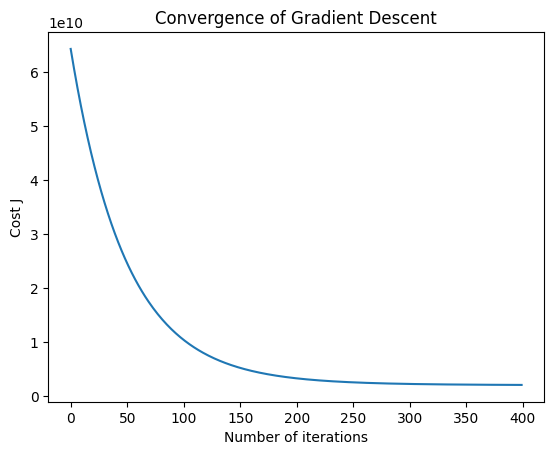

In [108]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent to optimize theta for linear regression with multiple variables.

    Args:
    X : numpy array of shape (m, n+1) - m examples, n features (plus intercept term)
    y : numpy array of shape (m,) - target values
    theta : numpy array of shape (n+1,) - initial parameters
    alpha : float - learning rate
    num_iters : int - number of iterations to run gradient descent

    Returns:
    theta : numpy array of shape (n+1,) - the optimized parameters
    J_history : list - the cost function value history
    """
    # TODO: Implement gradient descent for multiple variables
    # 1. Get the number of training examples (m)
    # 2. Make a copy of theta to update
    # 3. Create an empty list to store cost function history
    # 4. Implement the gradient descent loop:
    #    a. Compute predictions
    #    b. Compute the errors
    #    c. Update theta
    #    d. Calculate and store the cost for this iteration

    m = len(y) # number of training examples
    theta = theta.copy() # copy of theta
    J_history = [] # cost function history

    # gradient descent loop
    for i in range(num_iters):
        h = X.dot(theta) # predictions
        err = h - y # errors
        theta = theta - alpha * (1/m) * (X.T.dot(err)) # update theta
        J_history.append(compute_cost_multi(X, y, theta)) # cost function

    return theta, J_history

# Add intercept term to X
X_norm = np.column_stack([np.ones(X_norm.shape[0]), X_norm])

# Initialize fitting parameters
theta = np.zeros(X_norm.shape[1])

# Set hyperparameters
iterations = 400
alpha = 0.01

# Run gradient descent
theta_grad, J_history = gradient_descent_multi(X_norm, y, theta, alpha, iterations)

print("Theta found by gradient descent:")
print(theta_grad)

# Plot the convergence graph
plt.plot(range(iterations), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

In [109]:
#Making Predictions:

def predict_price(size, bedrooms, mu, sigma, theta):
    """
    Predict the price of a house given its size and number of bedrooms.

    Args:
    size : float - size of the house in square feet
    bedrooms : int - number of bedrooms
    mu : numpy array - means used for normalization
    sigma : numpy array - standard deviations used for normalization
    theta : numpy array - trained parameters

    Returns:
    price : float - predicted price of the house
    """
    # TODO: Implement the prediction function
    # 1. Normalize the input features
    # 2. Add the intercept term
    # 3. Make the prediction using the trained theta

    x = np.array([size, bedrooms])
    x_norm = (x - mu) / sigma
    x_norm = np.insert(x_norm, 0, 1)
    price = x_norm.dot(theta)

    return price

# Predict the price of a house with 1650 square feet and 3 bedrooms
size_grad = 1650
bedrooms_grad = 3

predicted_price_grad = predict_price(size_grad, bedrooms_grad, mu, sigma, theta_grad)

print(f"Predicted price of a house with {size_grad} sq ft and {bedrooms_grad} bedrooms: ${predicted_price_grad:.2f}")

Predicted price of a house with 1650 sq ft and 3 bedrooms: $289221.55


The normal equation is an analytical approach to finding the optimal parameters θ for linear regression. Unlike gradient descent, which iteratively approaches the minimum, the normal equation finds the optimal θ directly. While gradient descent can be more efficient for large datasets, the normal equation provides an exact solution without the need for feature scaling or iterative optimization.

Predicted price of a house with 1650 sq ft and 3 bedrooms using the normal equation: $293081.46
Predicted price of a house with 1650 sq ft and 3 bedrooms using gradient descent: $289221.55
R-squared value for normal equation: 0.7329
R-squared value for gradient descent: 0.7248


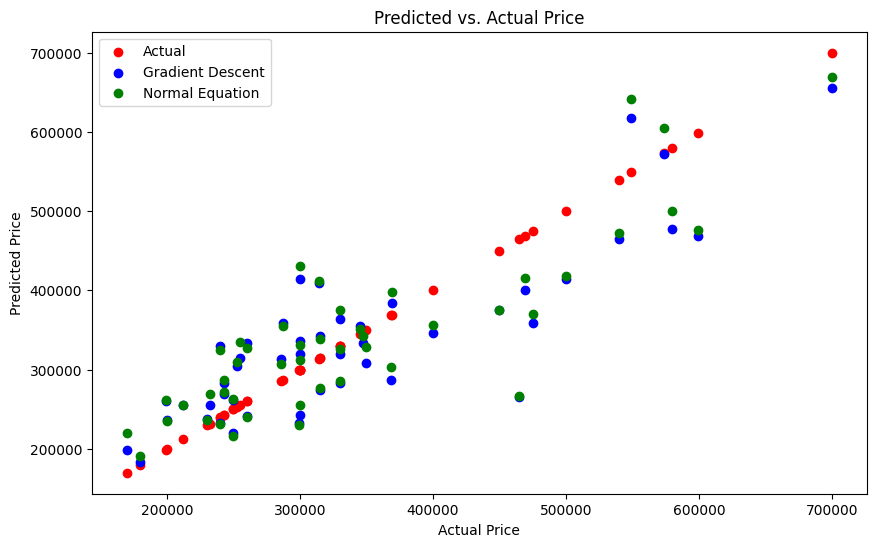

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (make sure you're using the original, non-normalized data)
data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

# Prepare the data
X = data[['Size', 'Bedrooms']].values
y = data['Price'].values

def normal_equation(X, y):
    """
    Compute the optimal theta using the normal equation method.

    Args:
    X : numpy array of shape (m, n) - m examples, n features
    y : numpy array of shape (m,) - target values

    Returns:
    theta : numpy array of shape (n+1,) - optimal parameters
    """
    # TODO: Implement the normal equation
    # 1. Add a column of ones to X for the intercept term
    # 2. Compute theta using the normal equation formula

    X = np.column_stack([np.ones(X.shape[0]), X])
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    return theta

# TODO: Use the normal equation to find the optimal theta
theta = normal_equation(X, y)

# TODO: Make a prediction for a house with 1650 square feet and 3 bedrooms
size = 1650
bedrooms = 3

predicted_price = np.array([1, size, bedrooms]).dot(theta)

# TODO: Compare this result with the prediction from gradient descent
print(f"Predicted price of a house with {size} sq ft and {bedrooms} bedrooms using the normal equation: ${predicted_price:.2f}")

size_grad = 1650
bedrooms_grad = 3

predicted_price_grad = predict_price(size_grad, bedrooms_grad, mu, sigma, theta_grad)

print(f"Predicted price of a house with {size_grad} sq ft and {bedrooms_grad} bedrooms using gradient descent: ${predicted_price_grad:.2f}")

# TODO: Create a function to compute the R-squared value for both models

def r_squared(y, y_pred):
    """
    Compute the R-squared value for a model's predictions.

    Args:
    y : numpy array of shape (m,) - true target values
    y_pred : numpy array of shape (m,) - predicted values

    Returns:
    r2 : float - R-squared value
    """
    y = np.array(y)
    y_pred = np.array(y_pred)
    r2 = 1 - ((y - y_pred) ** 2).sum() / ((y - y.mean()) ** 2).sum()
    return r2

# TODO: Compare the R-squared values for both models
X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
y_pred_normal = X_with_intercept.dot(theta)
r2_norm = r_squared(y, y_pred_normal)

X_norm_with_intercept = np.column_stack([np.ones(X_norm.shape[0]), X_norm])
y_pred_grad = X_norm.dot(theta_grad)
r2_grad = r_squared(y, y_pred_grad)

print(f"R-squared value for normal equation: {r2_norm:.4f}")
print(f"R-squared value for gradient descent: {r2_grad:.4f}")

# TODO: Create a plot comparing the predictions of both models with the actual data
plt.figure(figsize=(10, 6))
plt.scatter(y, y, color='red', label='Actual')
plt.scatter(y, y_pred_grad, color='blue', label='Gradient Descent')
plt.scatter(y, y_pred_normal, color='green', label='Normal Equation')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Price')
plt.legend()
plt.show()


In this final section, we'll summarize the key concepts we've covered throughout this linear regression assignment. We'll also suggest some additional exercises and improvements that you can pursue to deepen your understanding and expand your skills in machine learning and data analysis.

In [111]:
# This cell is for you to write a summary of what you've learned in this assignment.
# Consider the following questions:
# 1. What are the key steps in implementing linear regression?
# 2. What are the differences between single-variable and multi-variable linear regression?
# 3. Why is feature normalization important?
# 4. What are the pros and cons of gradient descent vs. the normal equation method?
# 5. How can we evaluate the performance of our linear regression model?

# Write your summary here:

"""
1. The key steps in implementing linear regression are:
    - Load, label, and prepare the dataset
    - Visualize the data to understand the relationship between features and target
    - Implement the cost function to measure the model's performance
    - Use gradient descent to optimize the model parameters (theta)
    - Make predictions and evaluate the model's performance based off those predictions and the cost function

2. Single-variable linear regression involves predicting a target variable using one feature, while multi-variable linear
    regression involves predicting the target using multiple features. The key difference is the number of features used in
    the prediction. Usually, multi-variable linear regression provides more accurate predictions as it considers multiple
    factors that can influence the target. However, it also requires more computational resources and can be more complex, which may
    not always be necessary.

3. Feature normalization is important because it helps to bring all features to a similar scale. This is crucial when features have
    different ranges and varies significantly. Normalizing features ensures that the model can learn effectively without being biased
    towards features with larger scales.

4. The normal equation method provides a closed-form solution to find an optimal soulution without the need for iteration, but
    it can be computationally expensive for large datasets. Gradient descent is an iterative optimization
    algorithm that is efficient for large datasets, but it requires hyperparameter tuning and feature scaling.

5. We can evaluate the performance of our linear regression model using various metrics such as:
    - R-squared value: measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
    - Mean Squared Error (MSE): measures the average of the squares of the errors or deviations.
    - Mean Absolute Error (MAE): measures the average of the absolute errors between the predicted and actual values.

    These metrics help us understand how well our model is performing and make comparisons between different models or approaches.
"""

# Now, think about potential improvements or extensions to this project.
# What additional analyses or techniques could be applied?
# List at least three ideas for further exercises or improvements:

"""
1.. Cross-Validation: Use cross-validation techniques to evaluate the model's performance on different subsets of the data
    and improve its robustness.
2.. Feature Engineering: Explore additional features or transformations that could enhance the model's predictive power.
    For example, creating new features by combining existing ones or using polynomial features..
3.. Hyperparameter Tuning: Optimize the hyperparameters of the model, such as the learning rate in gradient descent or the
    regularization parameter in regularization techniques, to improve the model's performance.
"""

"\n1.. Cross-Validation: Use cross-validation techniques to evaluate the model's performance on different subsets of the data\n    and improve its robustness.\n2.. Feature Engineering: Explore additional features or transformations that could enhance the model's predictive power.\n    For example, creating new features by combining existing ones or using polynomial features..\n3.. Hyperparameter Tuning: Optimize the hyperparameters of the model, such as the learning rate in gradient descent or the\n    regularization parameter in regularization techniques, to improve the model's performance.\n"

In [112]:
# Summary of key learnings

"""
1. Key steps in implementing linear regression:
   - Data loading and exploration
   - Feature normalization (for multi-variable regression)
   - Implementing the cost function
   - Implementing gradient descent or the normal equation
   - Model evaluation and making predictions

2. Differences between single-variable and multi-variable linear regression:
   - Multi-variable regression considers multiple features, requiring vector operations
   - Feature normalization becomes crucial in multi-variable regression
   - The complexity of the model increases, potentially requiring more data for accurate predictions

3. Importance of feature normalization:
   - Ensures all features are on a similar scale
   - Helps gradient descent converge faster and more reliably
   - Prevents features with larger scales from dominating the learning process

4. Gradient Descent vs. Normal Equation:
   Gradient Descent:
   - Pros: Works well with large datasets, can be used for other optimization problems
   - Cons: Requires choice of learning rate, may require many iterations
   Normal Equation:
   - Pros: Provides an exact solution, no need for feature scaling or iterations
   - Cons: Slow for very large datasets, can be computationally expensive

5. Evaluating linear regression performance:
   - Using the cost function to measure the error
   - Plotting predictions against actual values
   - Calculating R-squared to measure the goodness of fit
   - Using cross-validation to assess generalization (not covered in this assignment)

Throughout this assignment, we've gained hands-on experience with the entire process of implementing linear regression, from data preparation to model evaluation. We've seen how to handle both single and multiple variables, and compared different optimization techniques.
"""

# Ideas for further exercises or improvements

"""
1. Polynomial Regression: Extend the model to include polynomial features (e.g., x^2, x^3) to capture non-linear relationships in the data.

2. Regularization: Implement ridge regression (L2 regularization) to prevent overfitting, especially when dealing with many features.

3. Cross-Validation: Implement k-fold cross-validation to get a more robust estimate of the model's performance and help in hyperparameter tuning.

4. Feature Selection: Explore techniques for selecting the most relevant features, such as forward selection, backward elimination, or using p-values.

5. Residual Analysis: Perform a detailed analysis of the residuals to check the assumptions of linear regression (e.g., normality, homoscedasticity).

6. Interaction Terms: Investigate the effect of including interaction terms between features in the multi-variable regression model.

7. Outlier Detection and Handling: Implement methods to detect and handle outliers in the dataset, and observe how this affects the model's performance.

8. Learning Rate Optimization: For gradient descent, implement techniques to automatically find the optimal learning rate (e.g., line search).

9. Stochastic Gradient Descent: Implement stochastic gradient descent and mini-batch gradient descent, and compare their performance with batch gradient descent.

10. Visualization Improvements: Create more advanced visualizations, such as 3D plots for multi-variable regression or interactive plots using libraries like Plotly.
"""


"\n1. Polynomial Regression: Extend the model to include polynomial features (e.g., x^2, x^3) to capture non-linear relationships in the data.\n\n2. Regularization: Implement ridge regression (L2 regularization) to prevent overfitting, especially when dealing with many features.\n\n3. Cross-Validation: Implement k-fold cross-validation to get a more robust estimate of the model's performance and help in hyperparameter tuning.\n\n4. Feature Selection: Explore techniques for selecting the most relevant features, such as forward selection, backward elimination, or using p-values.\n\n5. Residual Analysis: Perform a detailed analysis of the residuals to check the assumptions of linear regression (e.g., normality, homoscedasticity).\n\n6. Interaction Terms: Investigate the effect of including interaction terms between features in the multi-variable regression model.\n\n7. Outlier Detection and Handling: Implement methods to detect and handle outliers in the dataset, and observe how this affe